# Complejidad de programación dinámica

Vamos a ver que la complejidad de programación dinámica es $\Theta(n \times R)$.

Para eso necesitamos:
1. Generar instancias aleatorias para distintos $n$ y $R$
2. Medir el tiempo de ejecución del algoritmo
3. Comparar los resultados

In [86]:
import numpy as np

!mkdir ../instancias
!mkdir ../instancias/dinamica

ns = np.arange(1000, 8000, 500)
k = 10
_R = np.arange(1000, 8000, 500)
_w = (1, 40)
_r = (1, 40)

for i in ns:
    for R in _R:
        #R = np.random.randint((_R[1] - _R[0])) + _R[0]
        w = np.random.randint((_w[1] - _w[0]), size = i) + _w[0]
        r = np.random.randint((_r[1] - _r[0]), size = i) + _r[0]
        f = open("../instancias/dinamica/{}_{}.in".format(i, R), "x")
        f.write("{} {}\n".format(i, R))
        for l in range(i-1):
            f.write("{} {}\n".format(w[l], r[l]))
        f.write("{} {}".format(w[i-1], r[i-1]))
        f.close()

mkdir: ../instancias: File exists


Ya tenemos instancias aleatorias para cada $n$ y $R$ de 1000 a 8000, ejecutemos! 

In [87]:
import os

os.system("g++ ../src/main.cpp -o ../algo3-tp1")

0

In [88]:
import time
import os
import pandas as pd

columnas = ["n", "R", "tiempo"];
filas = []

tiempos = [] # tiempos de ejecucion de pd

for i in ns:
    for R in _R:
        tiempo = 0 # acumuladores de tiempos de ejecucion

        for j in range(k): # ejecutamos k veces cada instancia
            start = time.time()
            os.system("./../algo3-tp1 ./../instancias/dinamica/{}_{}.in 3".format(i, R))
            tiempo += time.time() - start

        filas.append([i,R,tiempo / k])
pd_result = pd.DataFrame(filas, columns=columnas)

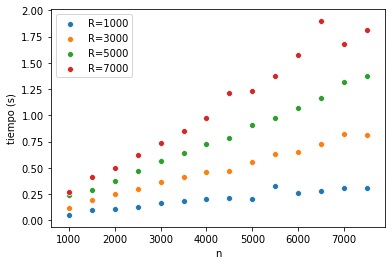

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
# Tiempo de ejecución en función de n, para R fijo.
fig = sns.scatterplot(data=pd_result[pd_result["R"]==1000], x='n', y='tiempo');
fig = sns.scatterplot(data=pd_result[pd_result["R"]==3000], x='n', y='tiempo');
fig = sns.scatterplot(data=pd_result[pd_result["R"]==5000], x='n', y='tiempo');
fig = sns.scatterplot(data=pd_result[pd_result["R"]==7000], x='n', y='tiempo');
fig.legend(labels=['R=1000','R=3000','R=5000','R=7000']);
fig.set(xlabel='n', ylabel='tiempo (s)');
plt.show()

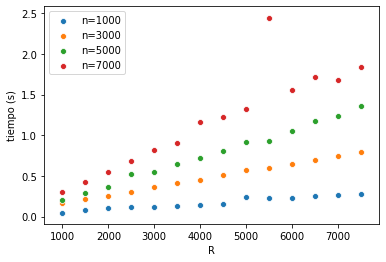

In [95]:
# Tiempo de ejecución en función de R, para n fijo.
fig = sns.scatterplot(data=pd_result[pd_result["n"]==1000], x='R', y='tiempo');
fig = sns.scatterplot(data=pd_result[pd_result["n"]==3000], x='R', y='tiempo');
fig = sns.scatterplot(data=pd_result[pd_result["n"]==5000], x='R', y='tiempo');
fig = sns.scatterplot(data=pd_result[pd_result["n"]==7000], x='R', y='tiempo');
fig.legend(labels=['n=1000','n=3000','n=5000','n=7000']);
fig.set(xlabel='R', ylabel='tiempo (s)');

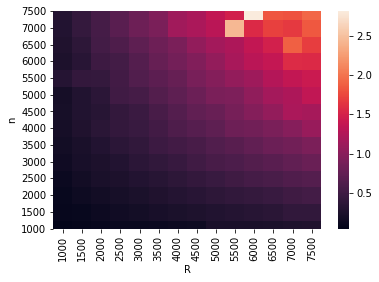

In [96]:
# Tiempo de ejecución en función de R y n.
df_heatmap = pd_result.pivot_table(index='n', columns='R', values='tiempo', aggfunc=np.mean);
fig = sns.heatmap(df_heatmap);
fig.invert_yaxis();

#plt.savefig("graficos/dp-heatmap.svg");

Índice de correlación de Pearson: 0.9696327606805836


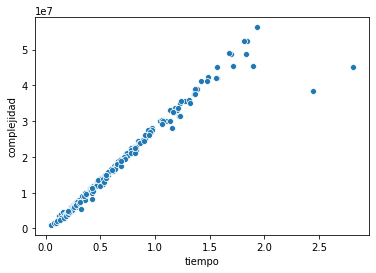

In [97]:
# Comparamos tiempos de ejecución y complejidad esperada. Calculamos coeficiente de Pearson
pd_result["complejidad"] = pd_result["n"] * pd_result["R"];
fig = sns.scatterplot(data=pd_result, x="tiempo", y="complejidad");
print("Índice de correlación de Pearson:", correlacion_pearson(pd_result, "tiempo", "complejidad"));